# 🔹 코사인 유사도 (Cosine Similarity)

## 1️⃣ 코사인 유사도란?
- **두 벡터가 얼마나 같은 방향을 가리키는지**를 수치로 나타낸 값  
- 크기(길이)는 무시하고 **방향**만 비교함  
- 값의 범위:
  - `1` → 완전히 같은 방향
  - `0` → 직각 (서로 무관)
  - `-1` → 정반대 방향

---

## 2️⃣ 수식
$ \cos(\theta) = \dfrac{A \cdot B}{\|A\| \, \|B\|} $

- $A \cdot B$ : 두 벡터의 내적 (dot product)  
- $\|A\|$, $\|B\|$ : 두 벡터의 크기 (norm)  
- $\theta$ : 두 벡터 사이의 각도  

---

## 3️⃣ 예시
- 벡터 $A = (1, 0)$  
- 벡터 $B = (0, 1)$  

$ \cos(\theta) = \dfrac{1 \times 0 + 0 \times 1}{\sqrt{1^2+0^2} \cdot \sqrt{0^2+1^2}} = 0 $

👉 즉, A와 B는 직각을 이루므로 유사도는 **0**  

---

## 4️⃣ 파이썬 실습 (코랩 실행용)

```python
import numpy as np

def cosine_similarity(a, b):
    dot = np.dot(a, b)              # 내적
    norm = np.linalg.norm(a) * np.linalg.norm(b)  # 크기 곱
    return dot / norm if norm != 0 else 0.0

# 예시 벡터
a = np.array([1, 2])
b = np.array([2, 3])
c = np.array([-1, -2])

print("cos(A,B) =", cosine_similarity(a, b))
print("cos(A,C) =", cosine_similarity(a, c))
print("cos(B,C) =", cosine_similarity(b, c))


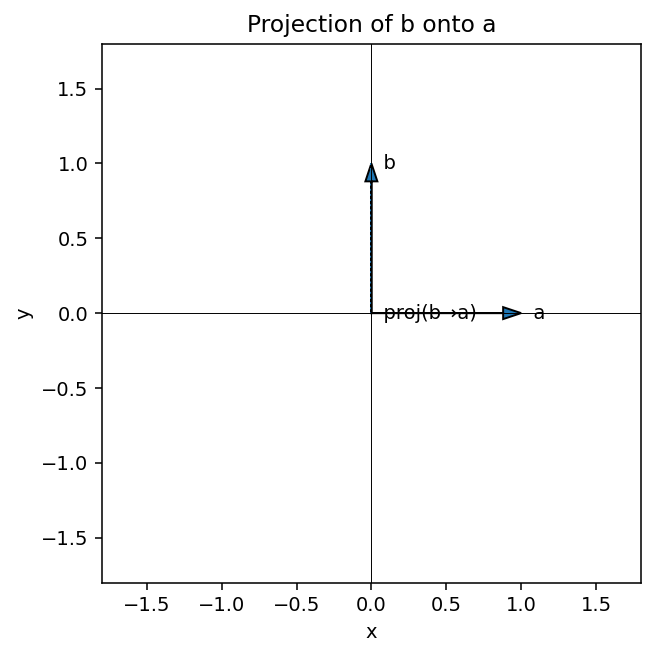

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# === 좌표만 바꿔서 쓰세요 ===
a = np.array([1.0, 0.0])   # 점 a
b = np.array([0.0, 1.0])   # 점 b
# ==========================

# b를 a에 투영: proj_b_on_a = ((b·a)/(a·a)) * a
def project(b, a):
    aa = np.dot(a, a)
    if aa == 0:
        return np.zeros_like(a)
    return (np.dot(b, a) / aa) * a

p = project(b, a)

# 그리기
fig, ax = plt.subplots(figsize=(5,5), dpi=140)

# 원점 기준 화살표 3개: a, b, proj(b on a)
ax.arrow(0,0, a[0], a[1], length_includes_head=True, head_width=0.08, head_length=0.12)
ax.arrow(0,0, b[0], b[1], length_includes_head=True, head_width=0.08, head_length=0.12)
ax.arrow(0,0, p[0], p[1], length_includes_head=True, head_width=0.08, head_length=0.12, linestyle="--")

# 보조선: a 방향으로의 수선(직교선) 표시(선택)
ax.plot([b[0], p[0]], [b[1], p[1]], linestyle=":", linewidth=1)

# 라벨
ax.text(a[0], a[1], "  a", va="center")
ax.text(b[0], b[1], "  b", va="center")
ax.text(p[0], p[1], "  proj(b→a)", va="center")

# 축/눈금/스케일
m = max(1.5, np.linalg.norm(a), np.linalg.norm(b)) * 1.2
ax.set_xlim(-m, m); ax.set_ylim(-m, m)
ax.set_aspect('equal', 'box')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel("x"); ax.set_ylabel("y")
ax.set_title("Projection of b onto a")

plt.show()


# 🔹 헝가리안 알고리즘 (Hungarian Algorithm)

## 1️⃣ 헝가리안 알고리즘이란?
- **할당 문제(Assignment Problem)**를 푸는 최적화 알고리즘  
- 예: $n$명의 작업자(worker)와 $n$개의 작업(job)이 있을 때,  
  각 작업자가 특정 작업을 수행할 비용(cost)이 주어짐  
- 목표: **전체 비용의 합을 최소화**하면서 모든 작업에 하나의 작업자를 배정하는 것  

---

## 2️⃣ 문제 정의
- 비용 행렬 $C = [c_{ij}]$  
  - $c_{ij}$ : 작업자 $i$가 작업 $j$를 수행할 때의 비용  
- 목표:  
  $ \min \sum_{i=1}^{n} c_{i, \pi(i)} $  
  여기서 $\pi$는 작업 할당을 나타내는 순열  

👉 즉, 각 행(작업자)에서 정확히 하나의 열(작업)을 선택하여 총합이 최소가 되도록 함  

---

## 3️⃣ 알고리즘 개념
1. **행 최소값/열 최소값 빼기**  
   - 모든 행에서 최소값을 빼고, 모든 열에서도 최소값을 빼서 0이 반드시 존재하도록 함  
2. **0을 이용한 매칭**  
   - 0이 있는 칸을 선택해가며 가능한 매칭을 찾음  
3. **매칭 불가능하면 조정**  
   - 모든 행과 열을 덮을 수 있는 최소 개수의 선으로 0들을 덮음  
   - 덮이지 않은 원소들에서 최소값을 빼고, 교차점에는 더함  
   - 다시 매칭 시도  
4. **최적 매칭 완성**  
   - 가능한 매칭이 $n$개가 되면 최적 해를 찾은 것  

---

## 4️⃣ 파이썬 실습 (코랩 실행용)



In [11]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# 비용 행렬 (예: 3명의 작업자, 3개의 작업)
cost_matrix = np.array([
    [4, 2, 8],
    [2, 3, 7],
    [3, 6, 2]
])

# 헝가리안 알고리즘 적용
row_ind, col_ind = linear_sum_assignment(cost_matrix)

print("작업자 배정 결과:")
for r, c in zip(row_ind, col_ind):
    print(f"작업자 {r} → 작업 {c} (비용 {cost_matrix[r, c]})")

print("총 최소 비용 =", cost_matrix[row_ind, col_ind].sum())

작업자 배정 결과:
작업자 0 → 작업 1 (비용 2)
작업자 1 → 작업 0 (비용 2)
작업자 2 → 작업 2 (비용 2)
총 최소 비용 = 6


# 🔹 헝가리안 알고리즘 시각화 (Colab 실행용)

아래 코드는 비용 행렬 $C$에 대해,
1) 원본 행렬  
2) **행 최소값**을 뺀 행렬  
3) **열 최소값**까지 뺀 행렬  
4) `scipy`의 헝가리안 알고리즘 결과(최적 할당)  
을 **열지도(heatmap)**와 **박스 표시**로 단계별 시각화합니다.

> 핵심 아이디어  
> - 행/열 최소값을 빼서 **0이 많이 생기게** 만들고  
> - 0으로 **완전 매칭**을 찾으면 최적입니다.

---

## ✅ 코드 실행


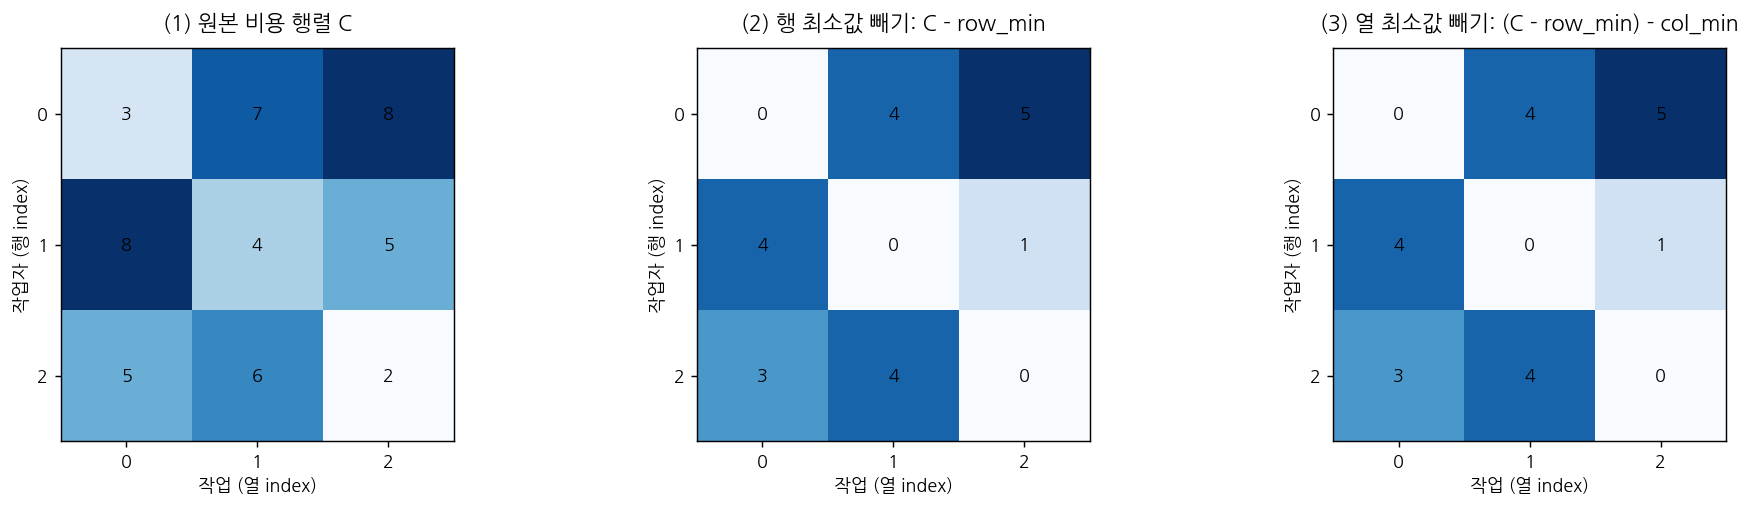

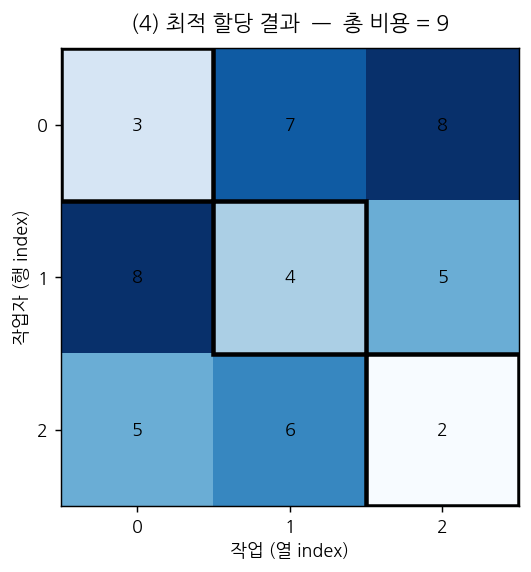

✅ 최적 할당 (작업자 → 작업):
  - 작업자 0 → 작업 0  (비용 3)
  - 작업자 1 → 작업 1  (비용 4)
  - 작업자 2 → 작업 2  (비용 2)
총 최소 비용 = 9


In [17]:
import numpy as np
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib
from scipy.optimize import linear_sum_assignment

# =========================
# 1) 비용 행렬 정의
# =========================
C = np.array([
    [4, 2, 8],
    [2, 3, 7],
    [3, 6, 2]
], dtype=float)

# =========================
# 2) 행/열 최소값 감소 (헝가리안 전처리)
# =========================
row_min = C.min(axis=1, keepdims=True)
C_row = C - row_min                # 행 최소값 빼기

col_min = C_row.min(axis=0, keepdims=True)
C_rc = C_row - col_min             # 열 최소값 빼기

# =========================
# 3) 최적 할당(헝가리안)
# =========================
r_idx, c_idx = linear_sum_assignment(C)  # 원본 C에서 최적
total_cost = C[r_idx, c_idx].sum()

# =========================
# 4) 시각화 유틸
# =========================
def plot_matrix(ax, M, title="", boxes=None, cmap="Blues", annotate=True):
    """
    M: 2D matrix
    boxes: list of (row, col) to draw rectangle highlights
    """
    im = ax.imshow(M, cmap=cmap, interpolation="nearest")
    ax.set_title(title, pad=10)
    ax.set_xlabel("작업 (열 index)")
    ax.set_ylabel("작업자 (행 index)")
    ax.set_xticks(range(M.shape[1]))
    ax.set_yticks(range(M.shape[0]))
    # 값 주석
    if annotate:
        for i in range(M.shape[0]):
            for j in range(M.shape[1]):
                ax.text(j, i, f"{M[i, j]:.0f}", ha="center", va="center")
    # 박스(최적 선택 등)
    if boxes:
        for (i, j) in boxes:
            rect = plt.Rectangle((j-0.5, i-0.5), 1, 1,
                                 fill=False, linewidth=2.5)
            ax.add_patch(rect)
    return im

# =========================
# 5) 그리기
# =========================
fig, axes = plt.subplots(1, 3, figsize=(15, 4), dpi=130)

plot_matrix(axes[0], C, title="(1) 원본 비용 행렬 C")
plot_matrix(axes[1], C_row, title="(2) 행 최소값 빼기: C - row_min")
plot_matrix(axes[2], C_rc, title="(3) 열 최소값 빼기: (C - row_min) - col_min")

plt.tight_layout()
plt.show()

# 최종 할당 결과를 원본 C 위에 표시
fig2, ax2 = plt.subplots(figsize=(5, 4.5), dpi=130)
plot_matrix(ax2, C, title=f"(4) 최적 할당 결과  —  총 비용 = {total_cost:.0f}",
            boxes=list(zip(r_idx, c_idx)))
plt.tight_layout()
plt.show()

# 상세 결과 출력
print("✅ 최적 할당 (작업자 → 작업):")
for r, c in zip(r_idx, c_idx):
    print(f"  - 작업자 {r} → 작업 {c}  (비용 {C[r, c]:.0f})")
print(f"총 최소 비용 = {int(total_cost)}")


# 🔹 칼만 필터 (Kalman Filter)

## 1️⃣ 한 줄 정의
> **잡음(노이즈)이 섞인 측정값들을 이용해, 보이지 않는 진짜 상태를 가장 그럴듯하게 추정하는 알고리즘**

---

## 2️⃣ 왜 필요할까?
- 센서 값은 항상 **노이즈** 때문에 흔들림
- 칼만 필터는 **모델 예측**과 **센서 측정**을 적절히 섞어
  더 정확하고 부드러운 값을 만들어 줌

---

## 3️⃣ 동작 단계
1. **예측 (Predict)**  
   - 이전 상태와 모델(예: 등속 이동)을 이용해 다음 상태를 예측  
   - 예: $x_{t} = x_{t-1} + v_{t-1}\Delta t$

2. **갱신 (Update)**  
   - 새로운 센서 측정값으로 예측을 보정  
   - 예: $z_t$ (센서 측정 위치)을 반영해 상태를 조금 당겨줌

---

## 4️⃣ 핵심 아이디어
- 모델을 **얼마나 믿을지** : $Q$ (프로세스 잡음)  
- 센서를 **얼마나 믿을지** : $R$ (측정 잡음)  
- 칼만 필터는 $Q$와 $R$을 바탕으로 **자동으로 최적 가중 평균**을 계산  

---

## 5️⃣ 간단한 수식
- 상태 벡터:  
  $x = \begin{bmatrix} \text{position} \\ \text{velocity} \end{bmatrix}$

- 예측 단계:  
  $x^- = F x$  
  $P^- = F P F^\top + Q$

- 갱신 단계:  
  $K = P^- H^\top \left(H P^- H^\top + R\right)^{-1}$  
  $x^+ = x^- + K(z - H x^-)$  
  $P^+ = (I - K H)P^-$

---

## 6️⃣ 쉽게 요약
- 칼만 필터는 "잡음 많은 측정값"을 그냥 쓰지 않고,  
- **모델 기반 예측**과 **센서 측정값**을 똑똑하게 섞어서  
- 실제 물체의 위치/속도를 가장 잘 추정하는 방법!


## 🧪 초간단 실습: 1D 등속 이동(위치·속도) + 위치 센서

- 진짜 물체는 등속으로 움직입니다.

- 센서는 위치만 관측하지만 노이즈가 섞여 흔들립니다.

- 칼만 필터로 “부드럽고 정확한” 위치·속도를 추정해봅니다.

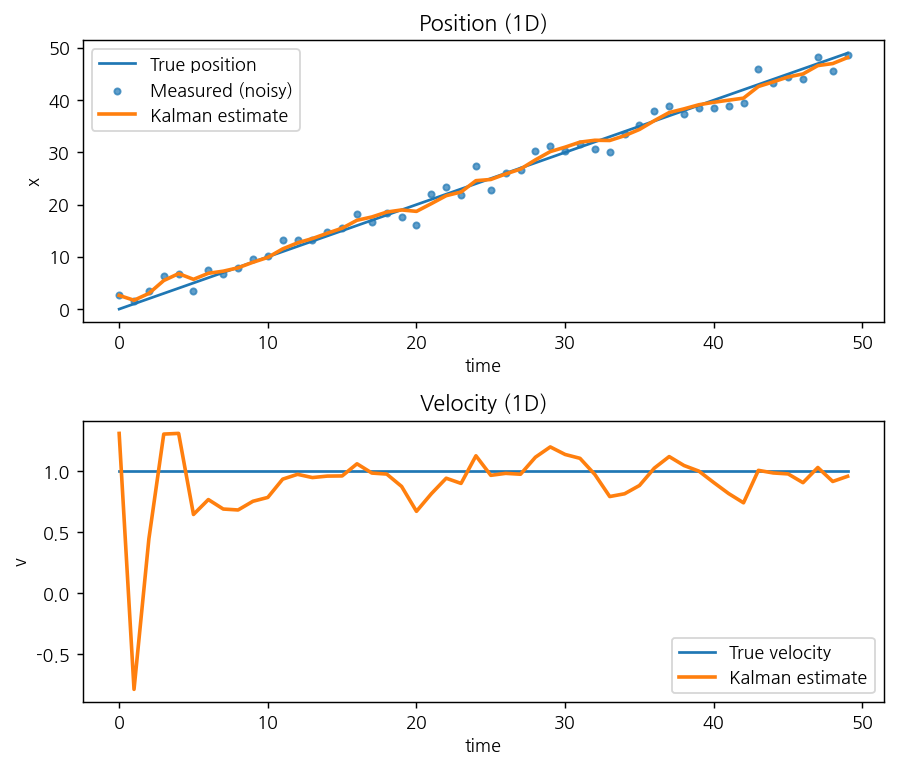

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# ----- 시뮬레이션 설정 -----
np.random.seed(0)
T = 50            # 스텝 수
dt = 1.0          # 시간 간격
true_x0 = 0.0     # 초기 위치
true_v0 = 1.0     # 초기 속도(등속)

# 진짜 궤적(등속)
true_pos = [true_x0]
true_vel = [true_v0]
for t in range(1, T):
    true_pos.append(true_pos[-1] + true_vel[-1]*dt)
    true_vel.append(true_vel[-1])  # 등속

true_pos = np.array(true_pos)
true_vel = np.array(true_vel)

# ----- 센서(측정): 위치만 보고, 노이즈가 있음 -----
meas_noise_std = 1.5
z = true_pos + np.random.randn(T)*meas_noise_std  # z_t = x_t + noise

# ----- 칼만 필터 설정(상태: [x, v]) -----
# 상태전이 F (등속 모델)
F = np.array([[1, dt],
              [0, 1 ]], dtype=float)

# 측정행렬 H (위치만 측정)
H = np.array([[1, 0]], dtype=float)

# 프로세스 잡음 Q (모델 불확실성)
# 등속이지만 약간의 가속 잡음을 허용하고 싶다면 dt^2, dt^3 항을 쓸 수 있으나 초간단히 작은 값 사용
q = 1e-2
Q = np.array([[q,   0],
              [0,   q ]], dtype=float)

# 측정 잡음 R (센서 불확실성)
R = np.array([[meas_noise_std**2]], dtype=float)

# 초기 상태 추정 x, 공분산 P
x = np.array([[0.0],   # 위치 초기 추정
              [0.0]])  # 속도 초기 추정
P = np.eye(2)*100.0     # 아주 불확실하게 시작

# 결과 저장
est_pos, est_vel = [], []

for t in range(T):
    # 1) 예측
    x = F @ x
    P = F @ P @ F.T + Q

    # 2) 갱신 (측정 사용)
    z_t = np.array([[z[t]]])            # 현재 측정 (위치만)
    y  = z_t - (H @ x)                  # 잔차
    S  = H @ P @ H.T + R
    K  = P @ H.T @ np.linalg.inv(S)     # 칼만 이득
    x  = x + K @ y
    P  = (np.eye(2) - K @ H) @ P

    est_pos.append(x[0,0])
    est_vel.append(x[1,0])

est_pos = np.array(est_pos)
est_vel = np.array(est_vel)

# ----- 시각화 -----
fig, axes = plt.subplots(2, 1, figsize=(7,6), dpi=130)
t = np.arange(T)

# 위치
axes[0].plot(t, true_pos, label="True position")
axes[0].scatter(t, z, s=12, label="Measured (noisy)", alpha=0.7)
axes[0].plot(t, est_pos, label="Kalman estimate", linewidth=2)
axes[0].set_title("Position (1D)")
axes[0].set_xlabel("time")
axes[0].set_ylabel("x")
axes[0].legend()

# 속도
axes[1].plot(t, true_vel, label="True velocity")
axes[1].plot(t, est_vel, label="Kalman estimate", linewidth=2)
axes[1].set_title("Velocity (1D)")
axes[1].set_xlabel("time")
axes[1].set_ylabel("v")
axes[1].legend()

plt.tight_layout()
plt.show()


# 🔹 DeepSORT에서 헝가리안 알고리즘의 역할

## 1) 개념 요약
- **트랙(Track)**: 같은 객체를 시간에 걸쳐 이어붙인 상태. 칼만필터로 다음 위치를 예측.
- **검출(Detections)**: 현재 프레임의 객체 검출 박스들(예: YOLO).
- **비용행렬(Cost Matrix)**: 각 `트랙 예측 ↔ 검출` 쌍의 “거리/유사도”로 구성.
  - DeepSORT는 보통 **appearance(임베딩) 코사인거리** + **motion(예측-관측) 마할라노비스 거리**를 섞어 비용을 만듦.
  - 간단 실습에서는 **IoU 거리(= 1 - IoU)** 또는 **유클리드 거리**를 사용.
- **헝가리안 알고리즘**: 비용합이 최소가 되도록 `트랙 ↔ 검출`을 1:1 매칭.

> 요약:  
> “트랙 예측”과 “검출 박스” 사이의 비용을 계산 → **헝가리안 알고리즘**으로 **최소비용 매칭** → 매칭된 트랙은 검출로 보정(update), 매칭 안 된 트랙은 age 증가(사라짐 처리), 매칭 안 된 검출은 새 트랙 생성.

---

## 2) 실습 코드 (간단 시뮬레이션)
- 2개의 객체가 선형으로 이동한다고 가정
- 각 프레임에서 **칼만필터**로 트랙 예측
- 검출은 약간의 **잡음**과 **가끔 누락/오탐**이 존재
- **IoU 거리**로 비용행렬 구성 후 **헝가리안 알고리즘**으로 매칭
- 매 프레임 결과를 산점도/박스로 시각화



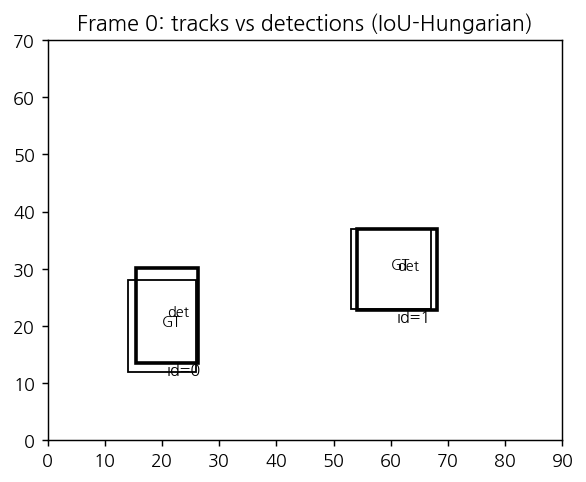

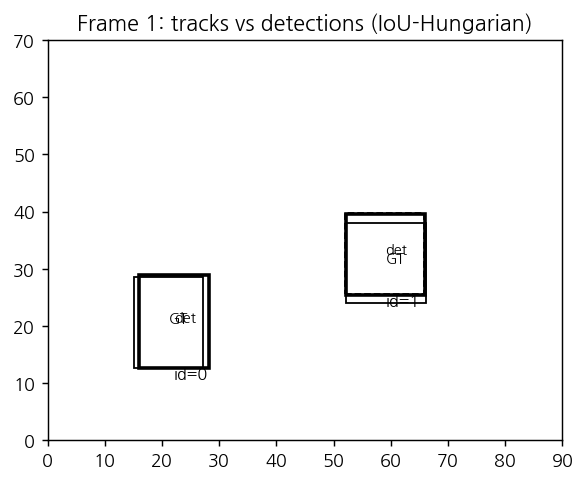

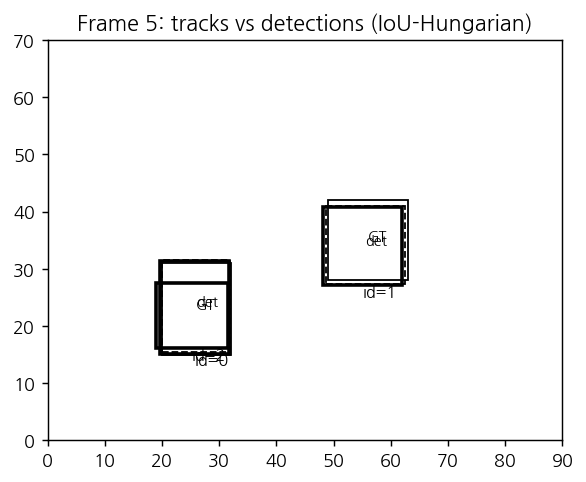

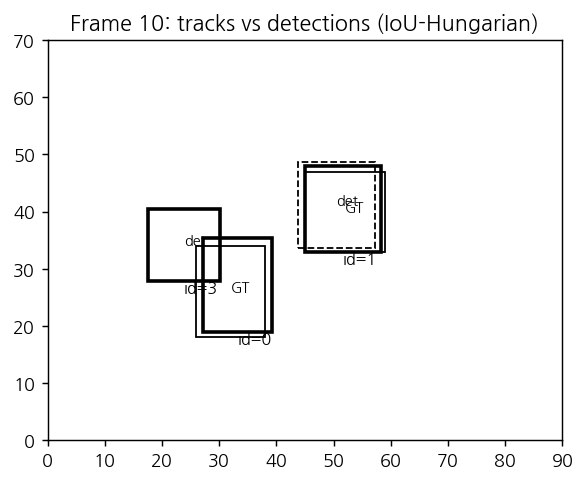

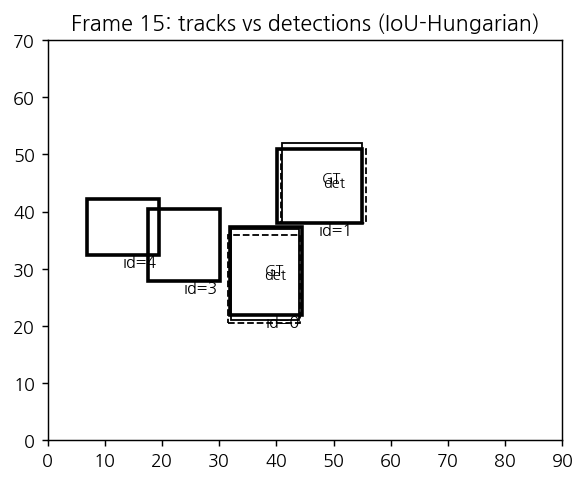

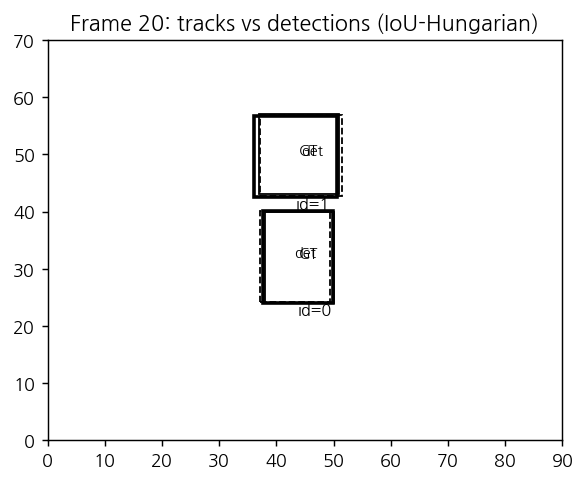

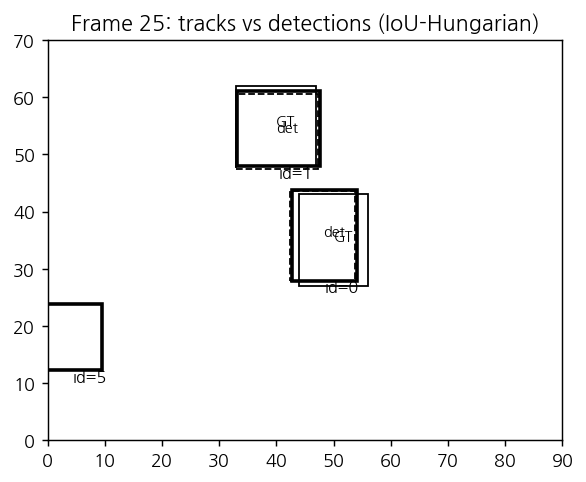

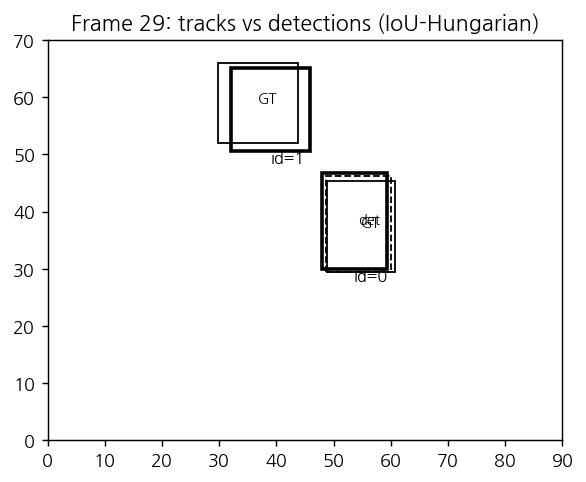

In [14]:
# DeepSORT의 data association 개념을 단순화한 시뮬레이션
# - dependency: scipy (헝가리안)
!pip -q install scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

# ----------------------------
# 도우미: 박스, IoU
# ----------------------------
def xywh_to_xyxy(b):
    x,y,w,h = b
    return np.array([x-w/2, y-h/2, x+w/2, y+h/2])

def iou(box1, box2):
    x1y1x2y2_1 = xywh_to_xyxy(box1)
    x1y1x2y2_2 = xywh_to_xyxy(box2)
    xA = max(x1y1x2y2_1[0], x1y1x2y2_2[0])
    yA = max(x1y1x2y2_1[1], x1y1x2y2_2[1])
    xB = min(x1y1x2y2_1[2], x1y1x2y2_2[2])
    yB = min(x1y1x2y2_1[3], x1y1x2y2_2[3])
    inter = max(0, xB-xA) * max(0, yB-yA)
    area1 = (x1y1x2y2_1[2]-x1y1x2y2_1[0]) * (x1y1x2y2_1[3]-x1y1x2y2_1[1])
    area2 = (x1y1x2y2_2[2]-x1y1x2y2_2[0]) * (x1y1x2y2_2[3]-x1y1x2y2_2[1])
    union = area1+area2-inter+1e-9
    return inter/union

# ----------------------------
# 간단한 칼만 필터 (상태: x, y, vx, vy) + 고정 w,h
# ----------------------------
class KalmanTrack:
    def __init__(self, xywh, track_id):
        x,y,w,h = xywh
        self.state = np.array([x,y,0.,0.])        # [x,y,vx,vy]
        self.P = np.eye(4)*10.0
        self.F = np.eye(4); self.F[0,2]=1; self.F[1,3]=1  # CV 모델(Δt=1)
        self.Q = np.eye(4)*0.05
        self.H = np.array([[1,0,0,0],[0,1,0,0]])
        self.R = np.eye(2)*1.0
        self.wh = np.array([w,h])                 # 박스 크기는 고정 가정(단순화)
        self.id = track_id
        self.age = 0
        self.missed = 0

    def predict(self):
        self.state = self.F @ self.state
        self.P = self.F @ self.P @ self.F.T + self.Q
        self.age += 1
        return self.get_xywh()

    def update(self, xy):
        # 관측: [x,y]
        z = np.array(xy)
        y = z - (self.H @ self.state)
        S = self.H @ self.P @ self.H.T + self.R
        K = self.P @ self.H.T @ np.linalg.inv(S)
        self.state = self.state + (K @ y)
        self.P = (np.eye(4) - K @ self.H) @ self.P
        self.missed = 0

    def get_xywh(self):
        x,y = self.state[0], self.state[1]
        w,h = self.wh
        return np.array([x,y,w,h])

# ----------------------------
# 시뮬레이션 데이터 생성
# ----------------------------
np.random.seed(0)

T = 30                          # 프레임 수
true_tracks = [
    {"start":[20,20], "vel":[1.2, 0.6], "wh":[12, 16]},   # obj A
    {"start":[60,30], "vel":[-0.8, 1.0], "wh":[14, 14]},  # obj B
]

def true_boxes_at_t(t):
    boxes=[]
    for tr in true_tracks:
        x = tr["start"][0] + tr["vel"][0]*t
        y = tr["start"][1] + tr["vel"][1]*t
        w,h = tr["wh"]
        boxes.append(np.array([x,y,w,h]))
    return boxes

def noisy_detections(boxes, miss_prob=0.1, fp_prob=0.15, noise_xy=1.2, noise_wh=0.5):
    dets=[]
    # 진짜 객체(약간의 노이즈, 가끔 누락)
    for b in boxes:
        if np.random.rand()<miss_prob:
            continue
        nx = b[0] + np.random.randn()*noise_xy
        ny = b[1] + np.random.randn()*noise_xy
        nw = max(6, b[2] + np.random.randn()*noise_wh)
        nh = max(6, b[3] + np.random.randn()*noise_wh)
        dets.append(np.array([nx,ny,nw,nh]))
    # 오탐(가짜) 추가
    if np.random.rand()<fp_prob:
        fx = np.random.uniform(0, 80)
        fy = np.random.uniform(0, 60)
        fw = np.random.uniform(8,16)
        fh = np.random.uniform(8,16)
        dets.append(np.array([fx,fy,fw,fh]))
    return dets

# ----------------------------
# 트래커 루프
# ----------------------------
tracks=[]
next_id=0
max_missed=5       # 이 프레임수 이상 매칭 못하면 삭제
iou_gate=0.1       # IoU가 너무 작으면 매칭 금지
history=[]         # 시각화용 기록

for t in range(T):
    gt = true_boxes_at_t(t)
    dets = noisy_detections(gt)

    # 1) 예측
    for tr in tracks:
        tr.predict()

    # 2) 비용행렬 (IoU 거리 = 1 - IoU)
    if len(tracks)>0 and len(dets)>0:
        cost = np.zeros((len(tracks), len(dets)))
        for i,tr in enumerate(tracks):
            tr_box = tr.get_xywh()
            for j,det in enumerate(dets):
                iou_ = iou(tr_box, det)
                cost[i,j] = 1.0 - iou_
                # 게이팅: IoU 너무 작으면 큰 비용 부여
                if iou_ < iou_gate:
                    cost[i,j] = 1e6
        row_ind, col_ind = linear_sum_assignment(cost)
        assigned=set()
        used_dets=set()

        # 3) 업데이트(매칭된 것만)
        for r,c in zip(row_ind, col_ind):
            if cost[r,c] < 1e5:  # 게이트 통과
                tracks[r].update(dets[c][:2])   # x,y만 업데이트(단순화)
                tracks[r].wh = dets[c][2:]      # w,h는 관측 반영
                assigned.add(r); used_dets.add(c)

        # 4) 매칭 안 된 트랙 처리
        for i,tr in enumerate(tracks):
            if i not in assigned:
                tr.missed += 1

        # 5) 매칭 안 된 검출 → 새 트랙 생성
        for j,det in enumerate(dets):
            if j not in used_dets:
                nt = KalmanTrack(det, next_id); next_id+=1
                tracks.append(nt)

    else:
        # 트랙 없음 → 전부 새 트랙
        for det in dets:
            nt = KalmanTrack(det, next_id); next_id+=1
            tracks.append(nt)
        # 검출 없음 → 트랙만 age/미스 증가
        for tr in tracks:
            tr.missed += 1

    # 6) 오래 미스난 트랙 제거
    tracks = [tr for tr in tracks if tr.missed <= max_missed]

    # 기록
    history.append({
        "t": t,
        "gt": gt,
        "dets": dets,
        "tracks": [ (tr.id, tr.get_xywh().copy()) for tr in tracks ]
    })

# ----------------------------
# 시각화 (프레임별 산점/박스)
# ----------------------------
def draw_frame(rec):
    fig, ax = plt.subplots(figsize=(6,4), dpi=130)

    # GT (작은 네모)
    for b in rec["gt"]:
        x,y,w,h = b
        ax.add_patch(plt.Rectangle((x-w/2, y-h/2), w, h, fill=False, linewidth=1))
        ax.text(x, y, "GT", fontsize=8)

    # Detections (점선 네모)
    for b in rec["dets"]:
        x,y,w,h = b
        ax.add_patch(plt.Rectangle((x-w/2, y-h/2), w, h, fill=False, linestyle="--", linewidth=1))
        ax.text(x, y, "det", fontsize=8)

    # Tracks (굵은 네모 + ID)
    for tid, b in rec["tracks"]:
        x,y,w,h = b
        ax.add_patch(plt.Rectangle((x-w/2, y-h/2), w, h, fill=False, linewidth=2))
        ax.text(x, y-h/2-2, f"id={tid}", fontsize=9)

    ax.set_xlim(0, 90); ax.set_ylim(0, 70)
    ax.set_aspect('equal')
    ax.set_title(f"Frame {rec['t']}: tracks vs detections (IoU-Hungarian)")
    plt.show()

# 몇 프레임만 확인
for idx in [0, 1, 5, 10, 15, 20, 25, 29]:
    draw_frame(history[idx])


# 🔹 DeepSORT: 헝가리안 + 칼만 + ReID 임베딩(코사인 거리) 결합 예제

## 1) 개념 요약
- **트랙(Track)**: 이전 프레임까지 이어진 객체 상태. 칼만필터로 다음 위치를 예측.
- **검출(Detection)**: 현재 프레임의 바운딩박스 + **ReID 임베딩(feature)**.
- **비용행렬(Cost)**:  
  - **모션 비용** $d_\text{motion}$: 칼만 예측과 관측의 **Mahalanobis 거리**  
  - **외형 비용** $d_\text{app}$: 임베딩 간 **코사인 거리**  
- **최종 비용**:  
  $$
  \text{Cost}(i,j) = \lambda \cdot \tilde d_\text{motion}(i,j) + (1-\lambda)\cdot d_\text{app}(i,j)
  $$
  - $\tilde d_\text{motion}$: 게이트(임계값)로 **0~1 범위로 정규화**  
  - $d_\text{app} = 1 - \cos(\mathbf{f}_i, \mathbf{g}_j)$ (작을수록 유사)

> DeepSORT 핵심: **좋은 비용정의 + 헝가리안 최소합 매칭 + 안정적인 트랙 관리**  
> (max age, min hits, 게이팅 등)

---

## 2) 실행 코드 (Colab)


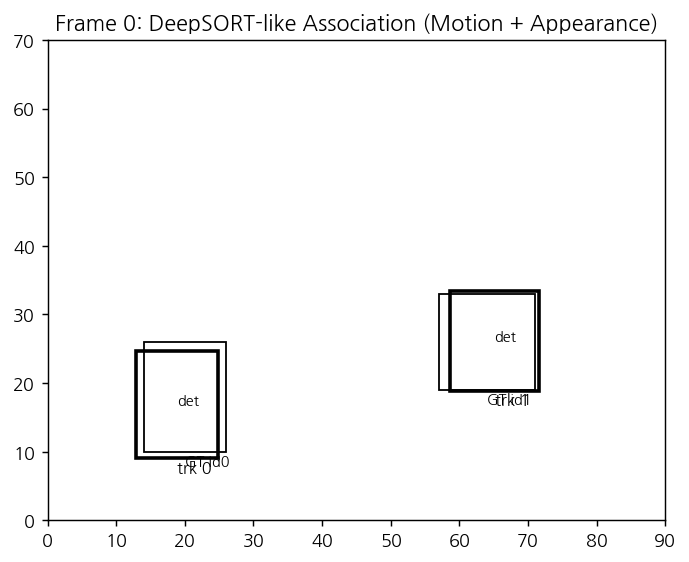

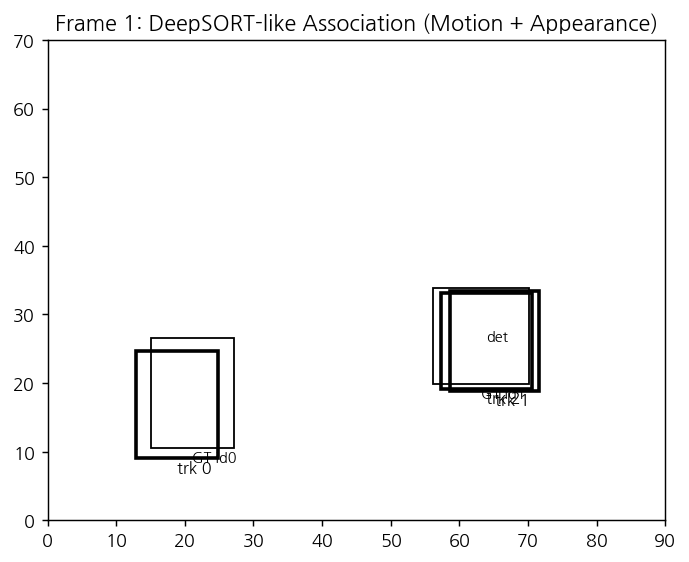

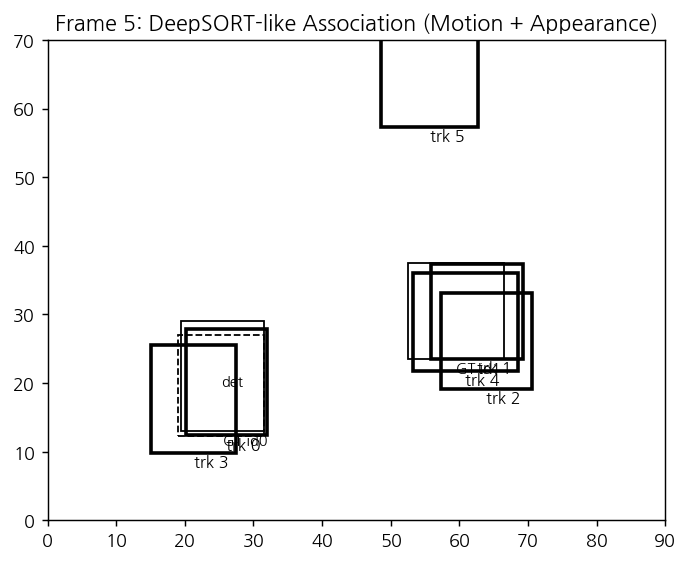

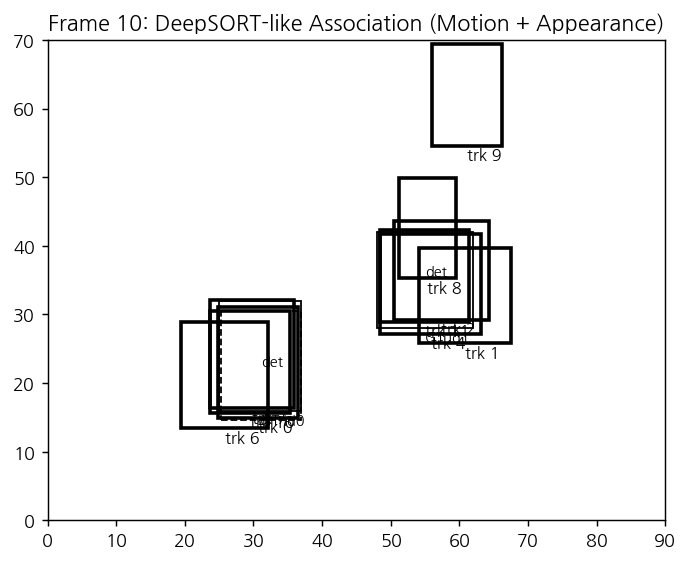

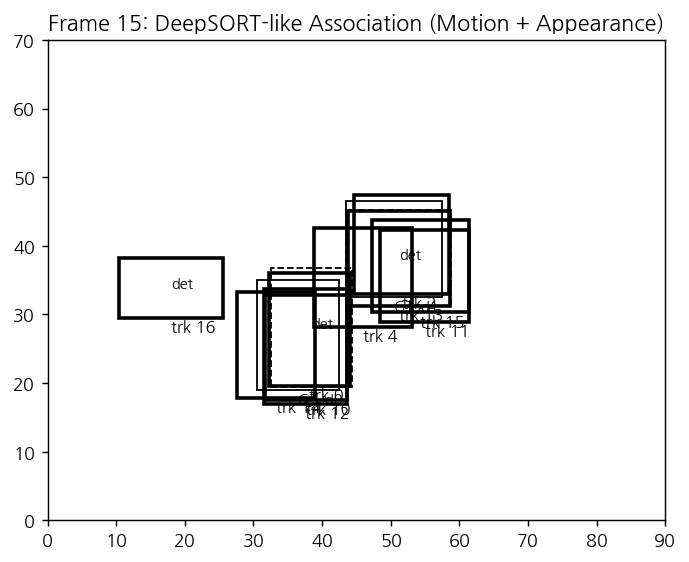

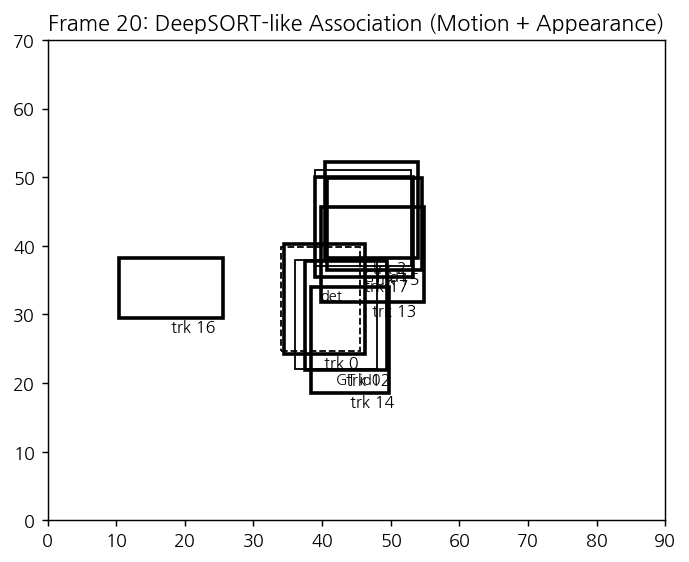

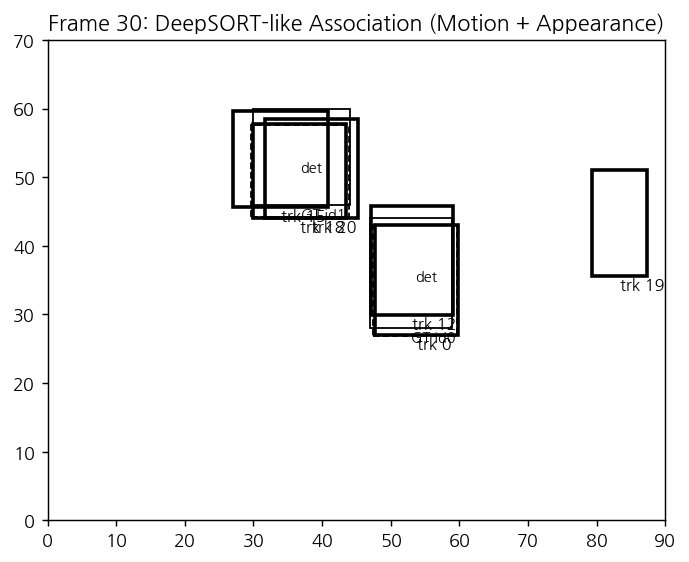

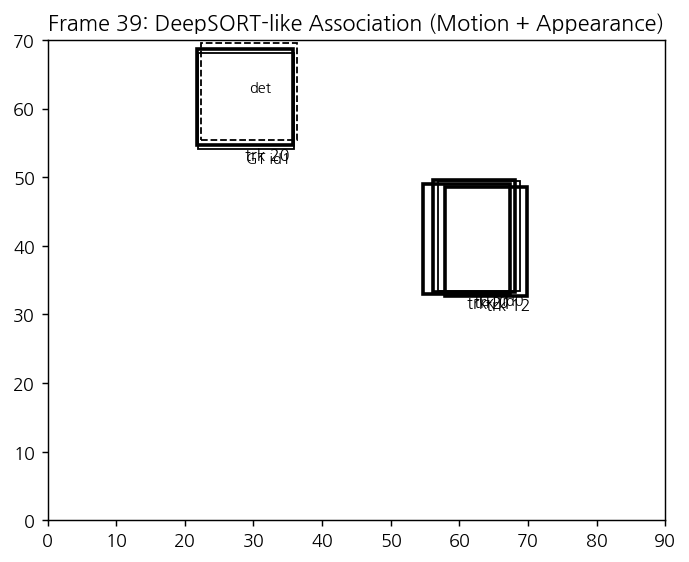

In [18]:
# DeepSORT 스타일: 칼만(Mahalanobis) + ReID 임베딩(코사인) + 헝가리안
!pip -q install scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from numpy.linalg import inv

# =========================================================
# 0) 유틸
# =========================================================
def l2norm(x, axis=-1, eps=1e-12):
    n = np.linalg.norm(x, axis=axis, keepdims=True)
    return x / np.clip(n, eps, None)

def cosine_distance(f, g):
    # f, g: (D,)
    return 1.0 - float(np.dot(f, g) / (np.linalg.norm(f)*np.linalg.norm(g) + 1e-12))

# =========================================================
# 1) 간단 칼만 (상태: x, y, vx, vy), 관측: [x,y]
# =========================================================
class KalmanTrack:
    def __init__(self, xywh, feat, track_id):
        x,y,w,h = xywh
        self.state = np.array([x,y,0.,0.], dtype=float)
        self.P = np.eye(4)*10.0
        self.F = np.eye(4); self.F[0,2]=1; self.F[1,3]=1
        self.Q = np.eye(4)*0.05
        self.H = np.array([[1,0,0,0],[0,1,0,0]], dtype=float)
        self.R = np.eye(2)*1.0
        self.wh = np.array([w,h], dtype=float)

        self.id = track_id
        self.age = 0
        self.missed = 0
        # 최근 appearance 특징 벡터(정규화). 여러 개를 평균해 사용(간단화).
        self.appearance_bank = [l2norm(feat.reshape(1,-1))[0]]

    def predict(self):
        self.state = self.F @ self.state
        self.P = self.F @ self.P @ self.F.T + self.Q
        self.age += 1
        return self.get_xywh()

    def update(self, xy, feat):
        # 칼만 업데이트
        z = np.array(xy, dtype=float)
        y = z - (self.H @ self.state)
        S = self.H @ self.P @ self.H.T + self.R
        K = self.P @ self.H.T @ inv(S)
        self.state = self.state + (K @ y)
        self.P = (np.eye(4) - K @ self.H) @ self.P
        self.missed = 0
        # w,h는 관측 반영(단순화)
        self.wh = self.wh*0.5 + 0.5*self.wh.clip(min=6)  # 안정화용(옵션)

        # appearance 갱신
        f = l2norm(feat.reshape(1,-1))[0]
        self.appearance_bank.append(f)
        if len(self.appearance_bank) > 10:  # 최근 10개만 유지
            self.appearance_bank = self.appearance_bank[-10:]

    def get_xywh(self):
        x,y = self.state[0], self.state[1]
        w,h = self.wh
        return np.array([x,y,w,h], dtype=float)

    def mean_feature(self):
        return l2norm(np.mean(np.stack(self.appearance_bank, axis=0), axis=0, keepdims=True))[0]

    def maha_distance_sq(self, xy):
        # d^2 = (z - Hx)^T S^{-1} (z - Hx)
        z = np.array(xy, dtype=float)
        y = z - (self.H @ self.state)
        S = self.H @ self.P @ self.H.T + self.R
        return float(y.T @ inv(S) @ y)

# =========================================================
# 2) 시뮬레이션 데이터: GT 궤적 + ReID 아이덴티티
# =========================================================
np.random.seed(7)
T = 40  # 프레임 수
D = 64  # 임베딩 차원

# 두 객체의 진짜 임베딩(항상 정규화)
id_feats = l2norm(np.random.randn(2, D))

# GT 궤적(선형 이동) & 박스 크기
true_tracks = [
    {"start":[20,18], "vel":[1.1, 0.6], "wh":[12, 16], "id":0},  # A
    {"start":[64,26], "vel":[-0.9, 0.9], "wh":[14, 14], "id":1}, # B
]

def true_boxes_at_t(t):
    boxes, ids = [], []
    for tr in true_tracks:
        x = tr["start"][0] + tr["vel"][0]*t
        y = tr["start"][1] + tr["vel"][1]*t
        w,h = tr["wh"]
        boxes.append(np.array([x,y,w,h], dtype=float))
        ids.append(tr["id"])
    return boxes, ids

def noisy_detection_with_feat(box, obj_id, miss_p=0.15, noise_xy=1.2, noise_wh=0.6, feat_noise=0.25):
    # 누락 확률
    if np.random.rand() < miss_p:
        return None
    # bbox 노이즈
    nx = box[0] + np.random.randn()*noise_xy
    ny = box[1] + np.random.randn()*noise_xy
    nw = max(6, box[2] + np.random.randn()*noise_wh)
    nh = max(6, box[3] + np.random.randn()*noise_wh)
    # appearance feat: 진짜 아이덴티티에 노이즈
    f = l2norm(id_feats[obj_id].reshape(1,-1) + feat_noise*np.random.randn(1, D))[0]
    return np.array([nx,ny,nw,nh]), f

def random_false_positive(fp_p=0.15):
    if np.random.rand() < fp_p:
        # 랜덤 위치/크기 + 랜덤 임베딩
        b = np.array([np.random.uniform(0, 90),
                      np.random.uniform(0, 70),
                      np.random.uniform(8,16),
                      np.random.uniform(8,16)], dtype=float)
        f = l2norm(np.random.randn(1,D))[0]
        return b, f
    return None

# =========================================================
# 3) 트래커 루프
# =========================================================
tracks=[]
next_id=0
max_missed=6

# 비용 가중치/게이팅
lam = 0.6                 # lambda (motion 비중)
chi2_95 = 5.991           # 2자유도 카이제곱 95% (게이팅 기준)
app_gate = 0.7            # appearance 코사인 거리 게이트(0~2, 작을수록 유사)

history = []

for t in range(T):
    gt_boxes, gt_ids = true_boxes_at_t(t)

    # 검출 생성(각 GT에 대해 noisy + FP 가능)
    dets, det_feats = [], []
    for b, gid in zip(gt_boxes, gt_ids):
        out = noisy_detection_with_feat(b, gid)
        if out is not None:
            db, f = out
            dets.append(db); det_feats.append(f)
    # false positive
    fp = random_false_positive()
    if fp is not None:
        db, f = fp
        dets.append(db); det_feats.append(f)

    # 1) 예측
    for tr in tracks:
        tr.predict()

    # 2) 비용행렬 (모션 Mahalanobis + appearance 코사인)
    if len(tracks)>0 and len(dets)>0:
        cost = np.zeros((len(tracks), len(dets)), dtype=float)
        for i,tr in enumerate(tracks):
            for j,(db, f) in enumerate(zip(dets, det_feats)):
                # motion: Mahalanobis d^2 -> 0~1로 정규화
                d2 = tr.maha_distance_sq(db[:2])
                d_motion_norm = min(d2/chi2_95, 1.0)   # 게이트 기준으로 스케일
                # appearance: cosine distance (0~2), 0~1로 클리핑
                d_app = min(cosine_distance(tr.mean_feature(), f), 1.0)
                # 최종 비용
                cost[i,j] = lam*d_motion_norm + (1-lam)*d_app
                # 하드 게이트(둘 중 하나라도 너무 나쁘면 배제)
                if d2 > chi2_95*2 or d_app > app_gate:
                    cost[i,j] = 1e6

        row_ind, col_ind = linear_sum_assignment(cost)
        assigned, used_dets = set(), set()

        # 3) 매칭 업데이트
        for r,c in zip(row_ind, col_ind):
            if cost[r,c] < 1e5:
                tracks[r].update(dets[c][:2], det_feats[c])
                tracks[r].wh = 0.7*tracks[r].wh + 0.3*dets[c][2:]  # 크기 보정(옵션)
                assigned.add(r); used_dets.add(c)

        # 4) 미스 증가
        for i,tr in enumerate(tracks):
            if i not in assigned:
                tr.missed += 1

        # 5) 미사용 검출 → 새 트랙
        for j,(db, f) in enumerate(zip(dets, det_feats)):
            if j not in used_dets:
                nt = KalmanTrack(db, f, next_id); next_id+=1
                tracks.append(nt)
    else:
        # 트랙이 없으면 전부 새로 생성 / 검출이 없으면 미스 증가
        if len(dets)>0:
            for db,f in zip(dets, det_feats):
                nt = KalmanTrack(db, f, next_id); next_id+=1
                tracks.append(nt)
        for tr in tracks:
            tr.missed += 1

    # 6) 오래 미스난 트랙 제거
    tracks = [tr for tr in tracks if tr.missed <= max_missed]

    # 기록
    history.append({
        "t": t,
        "gt": (gt_boxes, gt_ids),
        "dets": (dets, det_feats),
        "tracks": [(tr.id, tr.get_xywh().copy()) for tr in tracks]
    })

# =========================================================
# 4) 시각화
# =========================================================
def draw_frame(rec):
    fig, ax = plt.subplots(figsize=(6.8, 4.8), dpi=130)

    gt_boxes, gt_ids = rec["gt"]
    dets, det_feats = rec["dets"]

    # GT
    for b, gid in zip(gt_boxes, gt_ids):
        x,y,w,h = b
        ax.add_patch(plt.Rectangle((x-w/2, y-h/2), w, h, fill=False, linewidth=1))
        ax.text(x, y-h/2-2, f"GT id{gid}", fontsize=8)

    # Detections (점선)
    for b in dets:
        x,y,w,h = b
        ax.add_patch(plt.Rectangle((x-w/2, y-h/2), w, h, fill=False, linestyle="--", linewidth=1))
        ax.text(x, y, "det", fontsize=8)

    # Tracks (굵게 + track id)
    for tid, b in rec["tracks"]:
        x,y,w,h = b
        ax.add_patch(plt.Rectangle((x-w/2, y-h/2), w, h, fill=False, linewidth=2))
        ax.text(x, y-h/2-2, f"trk {tid}", fontsize=9)

    ax.set_xlim(0, 90); ax.set_ylim(0, 70)
    ax.set_aspect('equal')
    ax.set_title(f"Frame {rec['t']}: DeepSORT-like Association (Motion + Appearance)")
    plt.show()

for idx in [0, 1, 5, 10, 15, 20, 30, 39]:
    draw_frame(history[idx])


# 🔹 YOLO + ReID 백본 + 칼만 + 헝가리안 (DeepSORT-like) 스캐폴드

## 개요
- **YOLO**: 매 프레임 객체 박스(bbox) 검출
- **ReID 백본**: 검출 박스 crop → 임베딩 벡터 추출(코사인 거리로 비교)
- **칼만 필터**: 트랙 상태 예측(위치/속도)
- **헝가리안 알고리즘**: 모션 + 외형(임베딩) 결합 비용으로 1:1 매칭
- **출력**: 추적 ID가 그려진 비디오(mp4)

> 이 스캐폴드는 구조를 보기 위한 교육용 예제입니다.  
> 실제 서비스에서는 더 강력한 ReID 모델, 게이팅/생성/삭제 파라미터 튜닝, occlusion 처리 등을 추가하세요.

---

## 0) 설치


In [19]:
!pip -q install ultralytics==8.3.10
!pip -q install torch torchvision --index-url https://download.pytorch.org/whl/cpu
!pip -q install scipy opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 37.6 MB/s eta 0:00:00


## 1) 환경/유틸: 박스변환, IoU, 시각화


In [20]:
import os, math, cv2, numpy as np, torch, torch.nn as nn
import torch.nn.functional as F
from ultralytics import YOLO
from scipy.optimize import linear_sum_assignment
from numpy.linalg import inv

# ── 박스 변환 (xywh 중심기반 ↔ xyxy)
def xywh_to_xyxy(b):
    x,y,w,h = b
    return np.array([x-w/2, y-h/2, x+w/2, y+h/2], dtype=float)

def xyxy_to_xywh(b):
    x1,y1,x2,y2 = b
    w, h = x2-x1, y2-y1
    x, y = x1 + w/2, y1 + h/2
    return np.array([x,y,w,h], dtype=float)

# ── IoU
def iou_xywh(b1, b2):
    a = xywh_to_xyxy(b1); b = xywh_to_xyxy(b2)
    xA, yA = max(a[0], b[0]), max(a[1], b[1])
    xB, yB = min(a[2], b[2]), min(a[3], b[3])
    inter = max(0, xB-xA) * max(0, yB-yA)
    area1 = (a[2]-a[0])*(a[3]-a[1]); area2 = (b[2]-b[0])*(b[3]-b[1])
    return inter / (area1 + area2 - inter + 1e-9)

# ── crop helper
def crop_xywh(img, b, pad=2):
    h, w = img.shape[:2]
    x,y,ww,hh = b
    x1,y1,x2,y2 = map(int, xywh_to_xyxy([x,y,ww,hh]))
    x1 = max(0, x1-pad); y1 = max(0, y1-pad)
    x2 = min(w-1, x2+pad); y2 = min(h-1, y2+pad)
    if x2<=x1 or y2<=y1: return None
    return img[y1:y2, x1:x2]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## 2) ReID 백본: torchvision ResNet → 임베딩(L2 정규화)


In [21]:
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image

class ReIDBackbone(nn.Module):
    def __init__(self, dim=512):
        super().__init__()
        # 간단/빠른 resnet18 사용 (ImageNet pretrain)
        base = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.features = nn.Sequential(*list(base.children())[:-1])  # pool 전까지
        self.fc = nn.Linear(base.fc.in_features, dim, bias=False)

    def forward(self, x):
        # x: (B,3,H,W), 0..1
        f = self.features(x)             # (B, 512, 1, 1)
        f = torch.flatten(f, 1)          # (B, 512)
        f = self.fc(f)                   # (B, dim)
        f = F.normalize(f, p=2, dim=1)   # L2 정규화
        return f

# 입력 전처리
reid_tf = T.Compose([
    T.Resize((128,64)),
    T.ToTensor()
])

@torch.no_grad()
def embed_crops(model, crops, device):
    # crops: list[np.ndarray(H,W,3)]
    xs=[]
    for c in crops:
        if c is None:
            xs.append(torch.zeros(3,128,64))  # dummy
            continue
        im = Image.fromarray(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))
        xs.append(reid_tf(im))
    if not xs:
        return np.zeros((0,512), dtype=np.float32)
    x = torch.stack(xs).to(device)
    f = model(x).cpu().numpy()
    return f


## 3) 칼만 트랙과 비용(모션+외형), 헝가리안 매칭


In [22]:
def cosine_distance(f, g):
    # f,g: (D,)
    return 1.0 - float(np.dot(f, g) / (np.linalg.norm(f)*np.linalg.norm(g)+1e-12))

class KalmanTrack:
    def __init__(self, xywh, feat, tid):
        x,y,w,h = xywh
        self.state = np.array([x,y,0.,0.], dtype=float)  # [x,y,vx,vy]
        self.P = np.eye(4)*10.0
        self.F = np.eye(4); self.F[0,2]=1; self.F[1,3]=1
        self.Q = np.eye(4)*0.05
        self.H = np.array([[1,0,0,0],
                           [0,1,0,0]], dtype=float)
        self.R = np.eye(2)*1.0
        self.wh = np.array([w,h], dtype=float)

        self.id = tid
        self.age = 0
        self.missed = 0
        self.bank = [feat]

    def predict(self):
        self.state = self.F @ self.state
        self.P = self.F @ self.P @ self.F.T + self.Q
        self.age += 1

    def update(self, xy, feat):
        z = np.array(xy, dtype=float)
        y = z - (self.H @ self.state)
        S = self.H @ self.P @ self.H.T + self.R
        K = self.P @ self.H.T @ inv(S)
        self.state = self.state + (K @ y)
        self.P = (np.eye(4) - K @ self.H) @ self.P
        self.missed = 0
        # 외형 bank 갱신
        self.bank.append(feat)
        if len(self.bank) > 20: self.bank = self.bank[-20:]

    def get_xywh(self):
        x,y = self.state[0], self.state[1]
        return np.array([x,y,self.wh[0], self.wh[1]], dtype=float)

    def mean_feat(self):
        m = np.mean(np.stack(self.bank, 0), axis=0)
        m = m / (np.linalg.norm(m)+1e-12)
        return m

    def maha_d2(self, xy):
        z = np.array(xy, dtype=float)
        y = z - (self.H @ self.state)
        S = self.H @ self.P @ self.H.T + self.R
        return float(y.T @ inv(S) @ y)

class DeepSortLike:
    def __init__(self, lam=0.6, max_missed=20, motion_gate=5.991, app_gate=0.7):
        self.tracks=[]
        self.next_id=0
        self.lam = lam
        self.max_missed = max_missed
        self.motion_gate = motion_gate  # 2 dof 95%
        self.app_gate = app_gate

    def update(self, img, det_xywh, det_conf, det_cls, det_feats):
        # 1) 예측
        for tr in self.tracks:
            tr.predict()

        # 2) 비용행렬
        M, N = len(self.tracks), len(det_xywh)
        if M>0 and N>0:
            cost = np.zeros((M,N), dtype=float)
            for i,tr in enumerate(self.tracks):
                tfeat = tr.mean_feat()
                for j in range(N):
                    dxy = det_xywh[j][:2]
                    d2 = tr.maha_d2(dxy)
                    d_motion = min(d2/self.motion_gate, 1.0)
                    d_app = min(cosine_distance(tfeat, det_feats[j]), 1.0)
                    c = self.lam*d_motion + (1-self.lam)*d_app
                    # 하드 게이팅
                    if d2 > self.motion_gate*2 or d_app > self.app_gate:
                        c = 1e6
                    cost[i,j] = c
            row, col = linear_sum_assignment(cost)

            assigned=set(); used=set()
            # 3) 업데이트
            for r,c in zip(row, col):
                if cost[r,c] < 1e5:
                    self.tracks[r].update(det_xywh[c][:2], det_feats[c])
                    self.tracks[r].wh = 0.7*self.tracks[r].wh + 0.3*det_xywh[c][2:]
                    assigned.add(r); used.add(c)

            # 4) 미스 증가
            for i,tr in enumerate(self.tracks):
                if i not in assigned:
                    tr.missed += 1

            # 5) 미사용 검출 → 새 트랙
            for j in range(N):
                if j not in used:
                    tr = KalmanTrack(det_xywh[j], det_feats[j], self.next_id)
                    self.next_id += 1
                    self.tracks.append(tr)

        else:
            # 트랙 없으면 전부 생성 / 검출 없으면 미스 증가
            if N>0:
                for j in range(N):
                    tr = KalmanTrack(det_xywh[j], det_feats[j], self.next_id)
                    self.next_id += 1
                    self.tracks.append(tr)
            for tr in self.tracks:
                tr.missed += 1

        # 6) 오래 미스난 트랙 삭제
        self.tracks = [tr for tr in self.tracks if tr.missed <= self.max_missed]

        # 결과 (id, xywh)
        return [(tr.id, tr.get_xywh()) for tr in self.tracks]


## 4) 입력 비디오 준비 (업로드 or 웹샘플) & 메인 루프
- 방법 A: 좌측 파일탐색기에서 `sample.mp4` 업로드
- 방법 B: 아래 셀에서 예시 비디오를 다운로드 (권한 허용 필요)


In [26]:
# (선택) 예시 비디오 다운로드
# 작은 샘플로 테스트하고 싶다면 주석 해제해서 사용하세요.
# import urllib.request
# url = "https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.mp4"
# urllib.request.urlretrieve(url, "sample.mp4")
!gdown "https://drive.google.com/uc?id=1rjBn8Fl1E_9d0EMVtL24S9aNQOJAveR5&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1rjBn8Fl1E_9d0EMVtL24S9aNQOJAveR5&confirm=t
To: /content/test3.mp4
100% 4.98M/4.98M [00:00<00:00, 61.9MB/s]


In [27]:
# YOLO 로드 (COCO 사전학습)
yolo = YOLO('yolov8n.pt')   # 가벼운 모델

# ReID 백본 로드
device = 'cpu'  # Colab GPU 사용시 'cuda' 로 변경 가능
reid = ReIDBackbone(dim=512).to(device).eval()

# 트래커 준비
tracker = DeepSortLike(lam=0.6, max_missed=30, motion_gate=5.991, app_gate=0.7)

# 입력/출력
in_path = "test3.mp4"  # 업로드 또는 다운로드한 파일명
assert os.path.exists(in_path), "sample.mp4 파일을 업로드하거나 다운로드 하세요."
cap = cv2.VideoCapture(in_path)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) or 25
out = cv2.VideoWriter("tracked_output.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (w,h))

# 관심 클래스(사람/차 등) 선택 (None이면 전부)
keep_cls = {0, 2, 3, 5, 7}  # person=0, car=2, motorcycle=3, bus=5, truck=7

frame_idx=0
while True:
    ok, frame = cap.read()
    if not ok: break
    frame_idx += 1

    # YOLO 추론
    res = yolo.predict(source=frame, conf=0.3, verbose=False)[0]

    det_xywh = []
    det_crops = []
    det_conf = []
    det_cls  = []
    for b, c, s in zip(res.boxes.xyxy.cpu().numpy(),
                       res.boxes.cls.cpu().numpy(),
                       res.boxes.conf.cpu().numpy()):
        c = int(c)
        if keep_cls is not None and c not in keep_cls:
            continue
        x1,y1,x2,y2 = b
        xywh = xyxy_to_xywh([x1,y1,x2,y2])
        det_xywh.append(xywh)
        det_crops.append(crop_xywh(frame, xywh))
        det_conf.append(float(s))
        det_cls.append(c)

    # ReID 임베딩
    feats = embed_crops(reid, det_crops, device)

    # 추적 업데이트
    tracked = tracker.update(frame, det_xywh, det_conf, det_cls, feats)

    # 그리기
    for (tid, txywh) in tracked:
        x,y,w_,h_ = txywh
        x1,y1,x2,y2 = map(int, xywh_to_xyxy([x,y,w_,h_]))
        cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(frame, f'ID {tid}', (x1, max(0, y1-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)

    out.write(frame)

cap.release()
out.release()
print("✅ 저장 완료: tracked_output.mp4")


✅ 저장 완료: tracked_output.mp4


## 5) 파라미터 팁
- `lam`: 모션 vs 외형 가중치 (0.6~0.8 권장, 데이터에 따라 조정)
- `motion_gate`: 칼만 Mahalanobis 거리 게이트(자유도 2, 95% → 5.991 부근)
- `app_gate`: 코사인 거리 게이트 (0.3~0.8 권장; 작을수록 유사한 것만 허용)
- `keep_cls`: 추적할 COCO 클래스 ID 집합 (사람/차 등 선택)

---

## 6) 다음 단계(고도화 제안)
- **강력한 ReID 모델**(예: OSNet, FastReID 등)로 교체
- 임베딩 **EMA/Buffer 전략**, **전역/지역 정규화** 적용
- **카메라 보정/속도 스케일링**, **occlusion 복구**, **birth/death 로직** 튜닝
- **멀티 카메라**간 ID 스위치 방지(도메인 적응)
